In [1]:
install.packages(c("sampling", "survey"))

Installing packages into 'C:/Users/pleal/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'numDeriv', 'mitools'




package 'numDeriv' successfully unpacked and MD5 sums checked
package 'mitools' successfully unpacked and MD5 sums checked
package 'sampling' successfully unpacked and MD5 sums checked
package 'survey' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pleal\AppData\Local\Temp\RtmpcVsvmQ\downloaded_packages


In [9]:
#carga las librerias
library(sampling)
library(survey)
library(gapminder)

data(gapminder)


In [11]:
gap = gapminder[gapminder$year == 2007, ]
# Asegurarse de que la base de datos esté accesible
attach(gap)

# Crear la variable ingreso basada en los umbrales de la ONU
gap$ingreso <- as.factor(ifelse(gdpPercap < 1035, 'Bajo',
                         ifelse(gdpPercap < 4085, 'Medio Bajo',
                         ifelse(gdpPercap < 12615, 'Medio Alto', 'Alto'))))

# Ver las primeras filas con la nueva variable
head(gap)

country,continent,year,lifeExp,pop,gdpPercap,ingreso
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,2007,43.828,31889923,974.5803,Bajo
Albania,Europe,2007,76.423,3600523,5937.0295,Medio Alto
Algeria,Africa,2007,72.301,33333216,6223.3675,Medio Alto
Angola,Africa,2007,42.731,12420476,4797.2313,Medio Alto
Argentina,Americas,2007,75.320,40301927,12779.3796,Alto
Australia,Oceania,2007,81.235,20434176,34435.3674,Alto


### Comando Sample

In [17]:
# MAS DE 10 OBSERVACIONES
set.seed(29052025)
sample(1:10, 5)

[1] 3 8 5 4 9

In [20]:
sample(1:10, 5,replace = T)

[1] 7 7 8 8 2

## Base creada

In [26]:
datos = data.frame(x=1:12, estrato=gl(3,4))
attach(datos)
prob=x/78
muestra = sample(x, replace=F, 10,prob = prob)
muestra

The following objects are masked from datos (pos = 3):

    estrato, x




The following objects are masked from datos (pos = 4):

    estrato, x


The following objects are masked from datos (pos = 5):

    estrato, x




[1] 12 11  3 10  6  4  5  9  8  7

In [29]:
tapply(x, estrato, mean)

1    2    3 
 2.5  6.5 10.5

In [30]:
tapply(x, estrato, var)

1        2        3 
1.666667 1.666667 1.666667

In [35]:
estratif=tapply(datos$x, datos$estrato, sample, size = 2)
estratif

$`1`
[1] 2 3

$`2`
[1] 5 8

$`3`
[1] 11 12

## Librerias 

In [36]:
install.packages("samplingbook")

Installing package into 'C:/Users/pleal/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'pps'




package 'pps' successfully unpacked and MD5 sums checked
package 'samplingbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pleal\AppData\Local\Temp\RtmpcVsvmQ\downloaded_packages


e
positive number specifying the precision which is half width of confidence interval

S
standard deviation in population

N
positive integer for population size. Default is N=Inf, which means that calculations are carried out without finite population correction.

level
coverage probability for confidence intervals. Default is level=0.95.

In [ ]:
library(samplingbook)

sample.size.mean(e = 4, S=10, N=300, level = 0.9)


sample.size.mean object: Sample size for mean estimate
With finite population correction: N=300, precision e=4 and standard deviation S=10

Sample size needed: 17


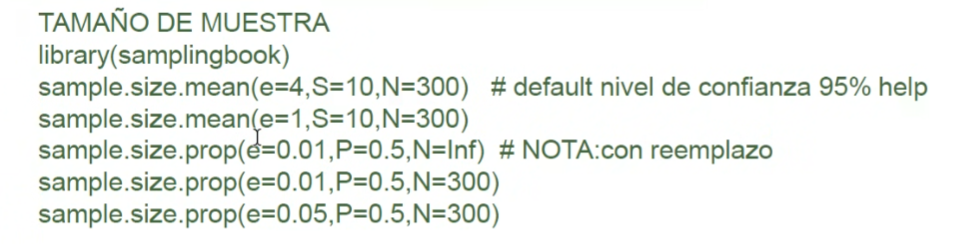

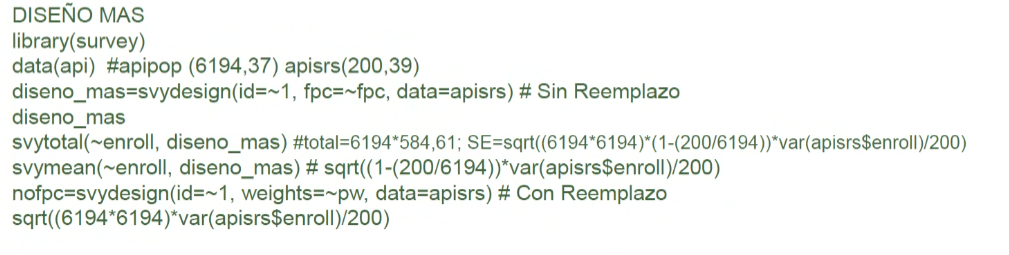

In [ ]:
library(survey)
data(api)
diseno_mas = svydesign(id = ~1, data = apisrs, fpc = ~fpc)
diseno_mas # crea un objeto de diseño muestral

Independent Sampling design
svydesign(id = ~1, data = apisrs, fpc = ~fpc)

In [47]:
svytotal(~enroll, diseno_mas)

         total     SE
enroll 3621074 169520

In [49]:
svymean(~enroll, diseno_mas)

         mean     SE
enroll 584.61 27.368

In [50]:
nofpc = svydesign(id = ~1,  weights = ~pw, data = apisrs)

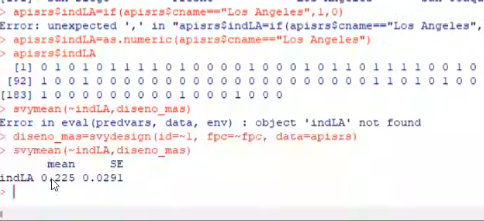

In [53]:
apisrs$indLA = as.numeric(apisrs$cname == "Los Angeles")
svymean(apisrs$indLA, diseno_mas)

      mean     SE
[1,] 0.225 0.0291

In [55]:
svymean(apisrs$indLA, nofpc, deff=T)

         mean       SE   DEff
[1,] 0.225000 0.029602 1.0334

In [57]:
cv(svymean(apisrs$indLA, nofpc, deff=T))

0.1315628


In [58]:
confint(svymean(apisrs$indLA, nofpc, deff=T))

2.5 %,97.5 %
